<a href="https://colab.research.google.com/github/4GeeksAcademy/Regresion-Regularizada-python-template/blob/main/Regresion_Regularizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Limipar este dataframe y crear otro con informacion relevante

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")

In [3]:
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

 Variables: https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/data_dict.csv

In [4]:
data.shape

(3140, 108)

3140 filas y 108 columnas

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
data = data.drop_duplicates().reset_index(drop = True)
data.shape

(3140, 108)

No habia duplicados

Quiero ver la variable state_name

In [7]:
valores_unicos = data['STATE_NAME'].unique()

print(valores_unicos)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Me quedo con esta variable categórica, son los estado de EEUU y lo voy a dividir en 4 regiones, y añado la variable region

La Oficina del Censo de los Estados Unidos define cuatro regiones y nueve divisiones oficiales a efectos estadísticos,y es el sistema de clasificación generalmente más utilizado:

Región 1 (Región Noreste)

Connecticut
Maine
Massachusetts
Nuevo Hampshire
Rhode Island
Vermont
Nueva Jersey
Nueva York
Pensilvania

Región 2 (Región Medio Oeste)

Illinois
Indiana
Míchigan
Ohio
Wisconsin
Dakota del Norte
Dakota del Sur
Iowa
Kansas
Minesota
Misuri
Nebraska

Región 3 (Región Sur)

Carolina del Norte
Carolina del Sur
Delaware
Distrito de Columbia
Florida
Georgia
Maryland
Virginia
Virginia Occidental
Alabama
Kentucky
Misisipi
Tennessee
Arkansas
Luisiana
Oklahoma
Texas

Región 4 (Región Oeste)

Arizona
Colorado
Idaho
Montana
Nevada
Nuevo México
Utah
Wyoming
Alaska
California
Hawái
Oregón
Washington

In [8]:
# Agrupar el DataFrame por la columna 'STATE_NAME'
grupos_estados = data.groupby('STATE_NAME')

# Crear un diccionario para almacenar los DataFrames divididos por estado
dataframes_por_estado = {}

# Iterar sobre los grupos y almacenar los DataFrames en el diccionario
for estado, grupo in grupos_estados:
    dataframes_por_estado[estado] = grupo



In [9]:


# Definir el diccionario de regiones
regiones = {
    'Noreste': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pensilvania'],
    'Medio oeste': ['Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Illinois', 'Minnesota', 'Iowa', 'Misuri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    'Sur': ['Delaware', 'Maryland', 'Virginia', 'Virginia Occidental', 'Kentucky', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Tennessee', 'Misisipi', 'Luisiana', 'Arkansas', 'Texas', 'Oklahoma'],
    'Oeste': ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'District of Columbia', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawai']
}

# Invertir el diccionario de regiones para tener un mapeo de estado a región
estado_a_region = {estado: region for region, estados in regiones.items() for estado in estados}

# Crear una nueva columna 'Región' en el DataFrame
data['Región'] = data['STATE_NAME'].map(estado_a_region)

# Agrupar el DataFrame por la columna 'Región'
grupos_regiones = data.groupby('Región')

# Crear un diccionario para almacenar los DataFrames divididos por región
dataframes_por_region = {}

# Iterar sobre los grupos y almacenar los DataFrames en el diccionario
for region, grupo in grupos_regiones:
    dataframes_por_region[region] = grupo




In [10]:


# Separar el DataFrame en cuatro DataFrames basados en la región
data_noreste = data[data['Región'] == 'Noreste']
data_medio_oeste = data[data['Región'] == 'Medio oeste']
data_sur = data[data['Región'] == 'Sur']
data_oeste = data[data['Región'] == 'Oeste']

# Concatenar los DataFrames en uno solo
data_final = pd.concat([data_noreste, data_medio_oeste, data_sur, data_oeste])

# Restablecer el índice del DataFrame resultante
data_final.reset_index(drop=True, inplace=True)

In [11]:
data_final.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Región
0,9001,943823,108385,11.483615,129955,13.769001,112617,11.932004,113230,11.996953,125353,13.281410,143173,15.169476,106677,11.302649,62683,6.641394,41750,4.423499,742641,78.684351,120100,12.724844,4887,0.517788,54887,5.815391,1019,0.107965,20289,2.149662,943823,366,19596,10.3,7.5,2.8,5.1,-7.6,-2.5,64890,139001,133981,303918,10.1,21.7,20.9,47.4,92971,10.0,12.7,12.2,91183,88535,93831,480767,461750,19017,4.0,91183,119.4,352.1,302.9,105.7,93.7,8.6,7.1,853.298109,427.969950,8.453727,1027.392058,206.852142,2275.901923,173,947328,197334,20.8,Fairfield,Connecticut,9,1,731785,31.7,30.0,33.4,231953,23.2,22.3,24.2,169774,5.5,4.9,6.1,40301,5.5,4.5,6.5,39898,8.6,7.9,9.3,62779,2.6,2.5,2.8,19329,3,Noreste
1,9003,892697,98354,11.017624,112199,12.568542,116495,13.049781,117045,13.111392,109541,12.270793,127517,14.284466,105187,11.783057,64171,7.188441,42188,4.725904,671681,75.241767,139802,15.660633,5043,0.564917,52233,5.851145,1100,0.123222,22838,2.558315,892697,-234,26012,10.3,9.3,1.0,6.1,-7.4,-1.3,65170,167539,154744,234993,10.5,26.9,24.9,37.8,96957,11.2,15.5,14.8,73037,70717,75357,480319,459939,20380,4.2,73037,95.6,352.1,302.9,105.7,93.7,8.6,7.1,807.075757,404.787222,7.995797,971.739201,195.647157,2152.618467,216,897417,201242,22.4,Hartford,Connecticut,9,3,705393,37.4,35.7,39.0,263554,28.8,27.7,29.8,203153,6.1,5.5,6.7,42859,5.9,5.0,6.9,41736,10.3,9.6,11.0,72956,2.9,2.7,3.1,20145,1,Nore

In [12]:
data_final.shape

(2752, 109)

He perdido casi 400 datos, pero quiero limpiarlo, voy a seguir Cesar

In [13]:
conteo_region = data_final.groupby('Región').size()

print(conteo_region)

Región
Medio oeste     940
Noreste         150
Oeste           442
Sur            1220
dtype: int64


Ya tengo esa variable incluida, Region.

In [14]:

column_names = data_final.columns.tolist()
print(column_names)


['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

Ahora voy a seleccionar las variables que quiero incluir en mi analisis y crear un nuevo dataframe y cambiar el nombre de una que esta erronea

In [15]:

# Cambiar el nombre de la columna '19-Oct' a '10-19'
data_final = data_final.rename(columns={'19-Oct': '10-19'})

# Seleccionar las columnas deseadas para el nuevo DataFrame
columnas_deseadas = [
    'Región', 'CKD_number', 'diabetes_number', 'COPD_number', 'Heart disease_number', 'Obesity_number',
    '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
]

# Crear el nuevo DataFrame con las columnas seleccionadas
total_data = data_final[columnas_deseadas].copy()

print(total_data)



       Región  CKD_number  diabetes_number  COPD_number  Heart disease_number  \
0     Noreste       19329            62779        39898                 40301   
1     Noreste       20145            72956        41736                 42859   
2     Noreste        4233            13700         9762                 10150   
3     Noreste        3637            12051         7922                  8502   
4     Noreste       19430            73592        43306                 44330   
...       ...         ...              ...          ...                   ...   
2747    Oeste         821             2834         2098                  1862   
2748    Oeste         447             1360          928                   981   
2749    Oeste         430             1500         1163                  1034   
2750    Oeste         207              686          506                   500   
2751    Oeste         185              644          480                   471   

      Obesity_number     0-

In [16]:
data.rename(columns={'19-Oct': '10-19'}, inplace=True)

# 2.Analisis Exploratorio

In [17]:
total_data.shape

(2752, 15)

In [18]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Región                2752 non-null   object
 1   CKD_number            2752 non-null   int64 
 2   diabetes_number       2752 non-null   int64 
 3   COPD_number           2752 non-null   int64 
 4   Heart disease_number  2752 non-null   int64 
 5   Obesity_number        2752 non-null   int64 
 6   0-9                   2752 non-null   int64 
 7   10-19                 2752 non-null   int64 
 8   20-29                 2752 non-null   int64 
 9   30-39                 2752 non-null   int64 
 10  40-49                 2752 non-null   int64 
 11  50-59                 2752 non-null   int64 
 12  60-69                 2752 non-null   int64 
 13  70-79                 2752 non-null   int64 
 14  80+                   2752 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 

In [19]:
total_data = total_data.drop_duplicates().reset_index(drop = True)

In [20]:
total_data.shape

(2752, 15)

No habia duplicados

Univariante categoricas

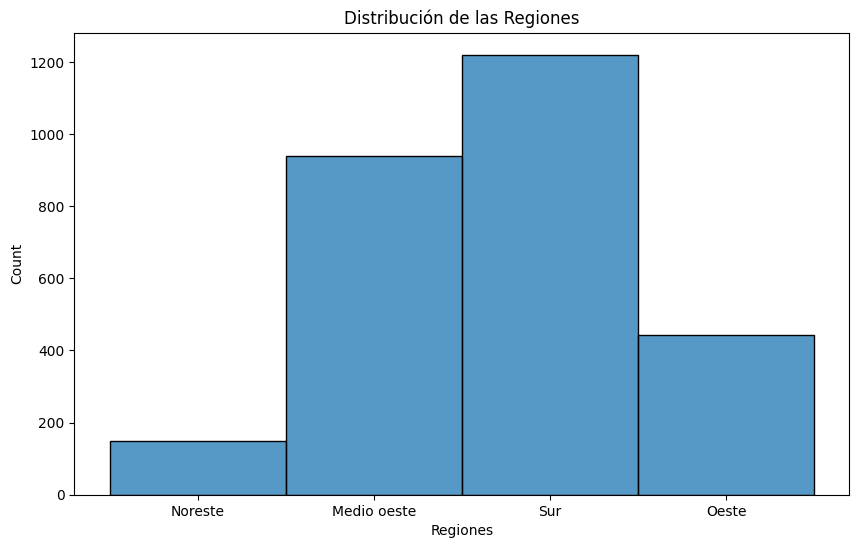

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot( data = total_data, x = "Región")
plt.title('Distribución de las Regiones')
plt.xlabel('Regiones')
plt.show()

La región con mas datos es la sur

Univariante numericas(todas menos las de edad, despues las metere en bivariable)

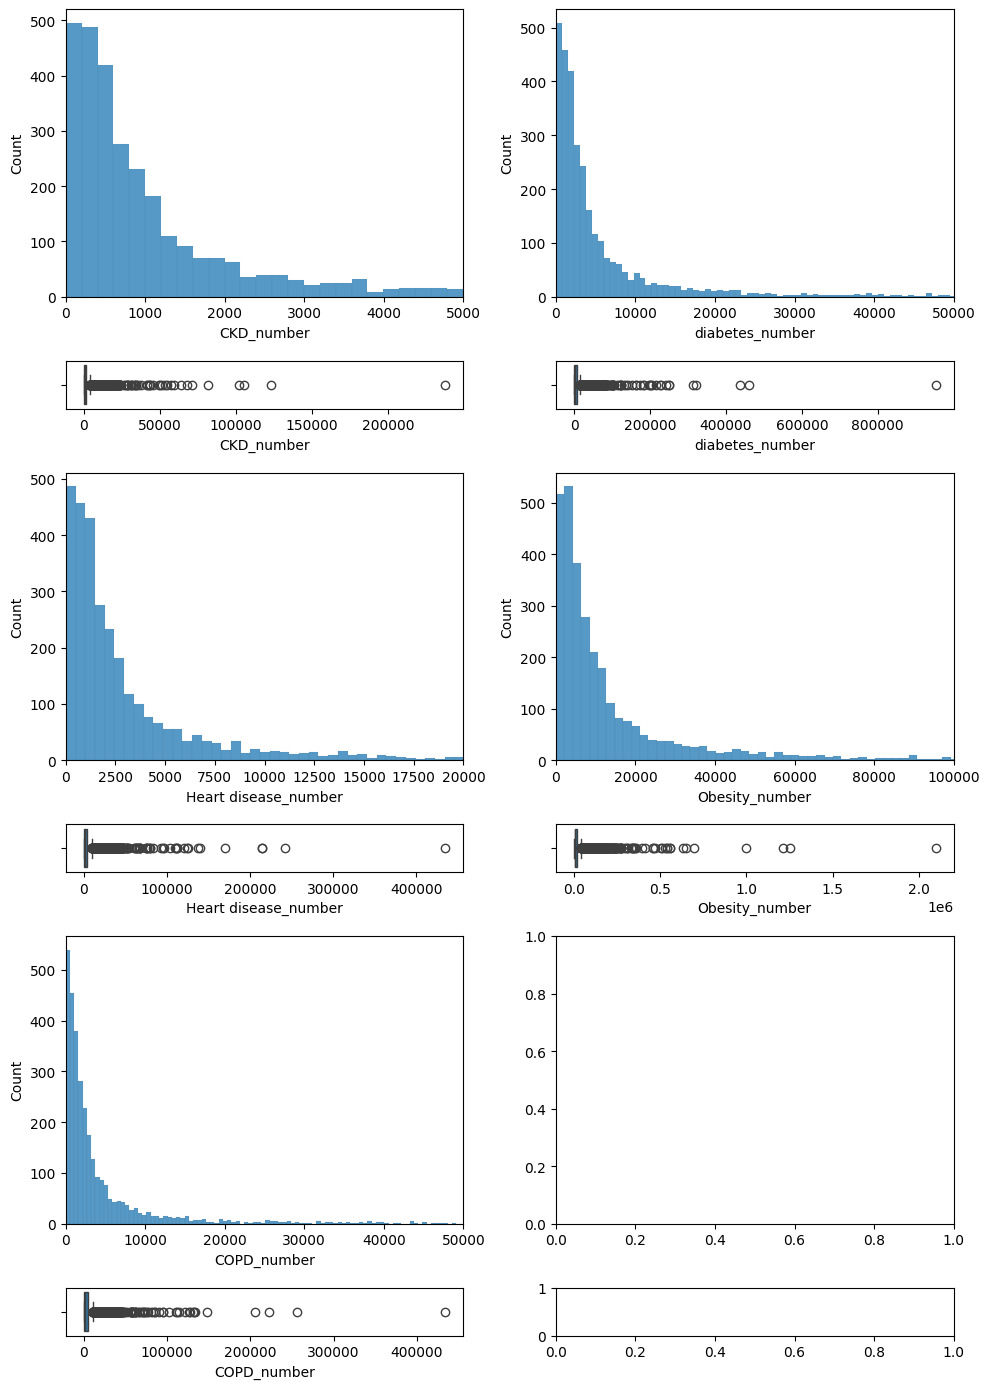

In [22]:
fig, axis = plt.subplots(6, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "CKD_number").set_xlim(0, 5000)
sns.boxplot(ax = axis[1, 0], data = data, x = "CKD_number")

sns.histplot(ax = axis[0, 1], data = data, x = "diabetes_number").set_xlim(0, 50000)
sns.boxplot(ax = axis[1,1], data = data, x = "diabetes_number")

sns.histplot(ax = axis[2, 0], data = data, x = "Heart disease_number").set_xlim(0, 20000)
sns.boxplot(ax = axis[3, 0], data = data, x = "Heart disease_number")

sns.histplot(ax = axis[2,1], data = data, x = "Obesity_number").set_xlim(0, 100000)
sns.boxplot(ax = axis[3, 1], data = data, x = "Obesity_number")

sns.histplot(ax = axis[4,0], data = data, x = "COPD_number").set_xlim(0, 50000)
sns.boxplot(ax = axis[5, 0], data = data, x = "COPD_number")




plt.tight_layout()

plt.show()

T0das contienen datos atipicos

Analisis multivariable

Numericas con numericas

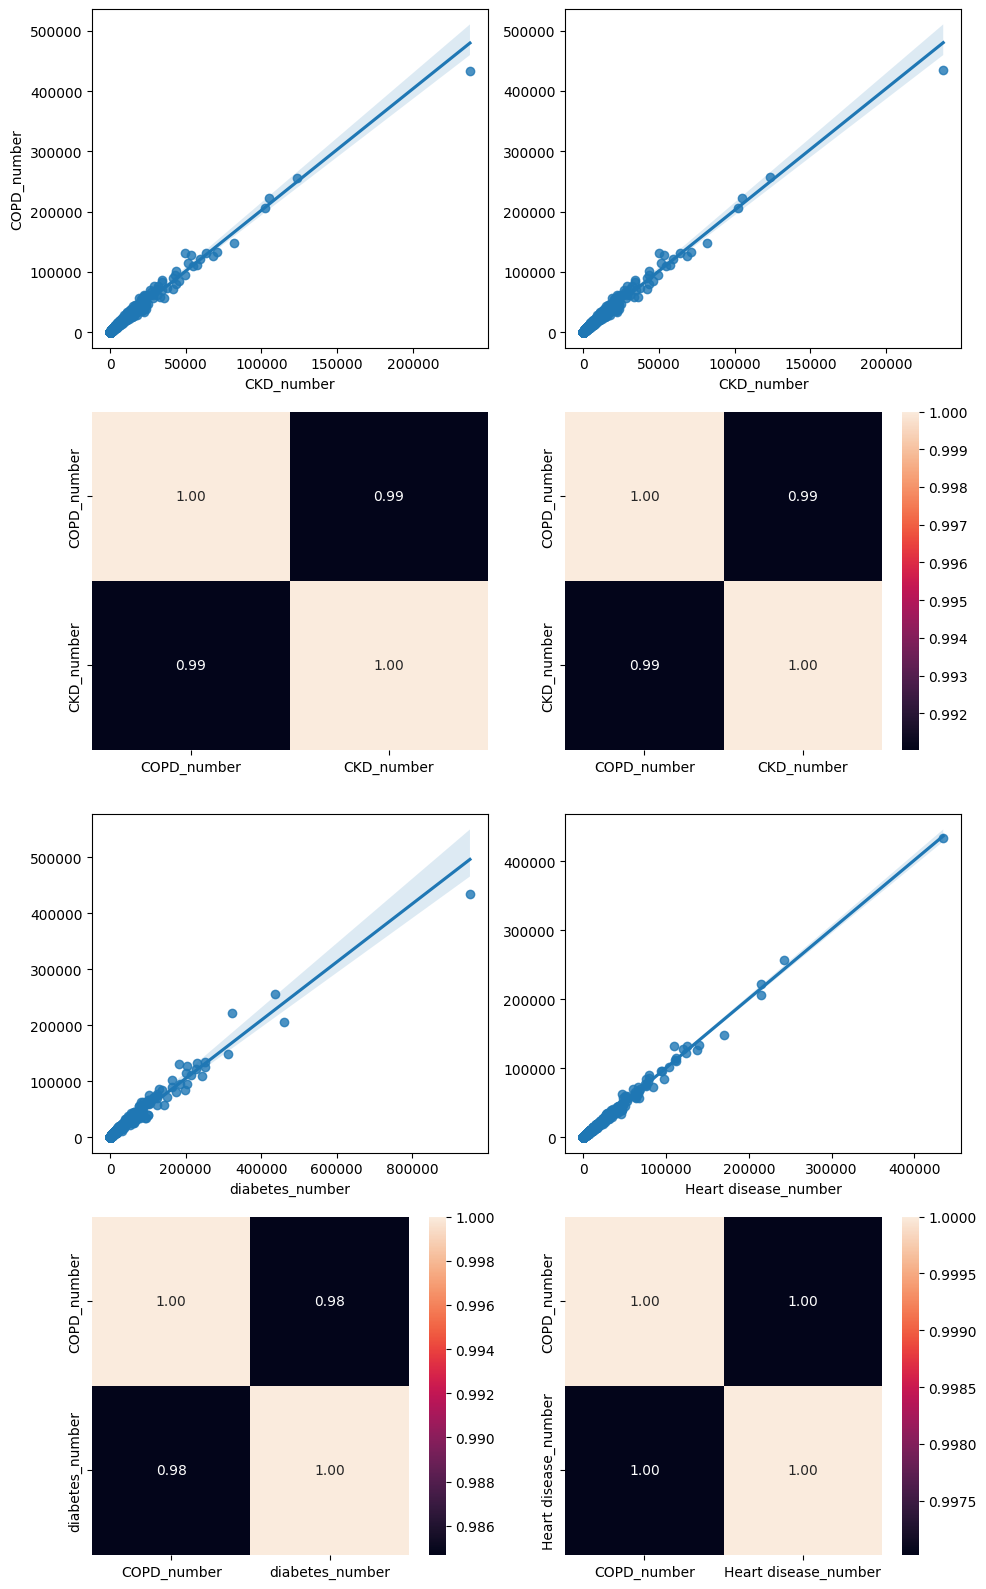

In [23]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = data, x = "CKD_number", y = "COPD_number")
sns.heatmap(data[["COPD_number", "CKD_number"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "CKD_number", y = "COPD_number").set(ylabel = None)
sns.heatmap(data[["COPD_number", "CKD_number"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "diabetes_number", y = "COPD_number").set(ylabel = None)
sns.heatmap(data[["COPD_number", "diabetes_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

sns.regplot(ax = axis[2, 1], data = data, x = "Heart disease_number", y = "COPD_number").set(ylabel = None)
sns.heatmap(data[["COPD_number", "Heart disease_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

plt.tight_layout()

plt.show()

Existe una alta correlacion entre todas

In [24]:
from sklearn.preprocessing import MinMaxScaler
total_data["Region_n"] = pd.factorize(total_data["Región"])[0]

Analisis categorico completo

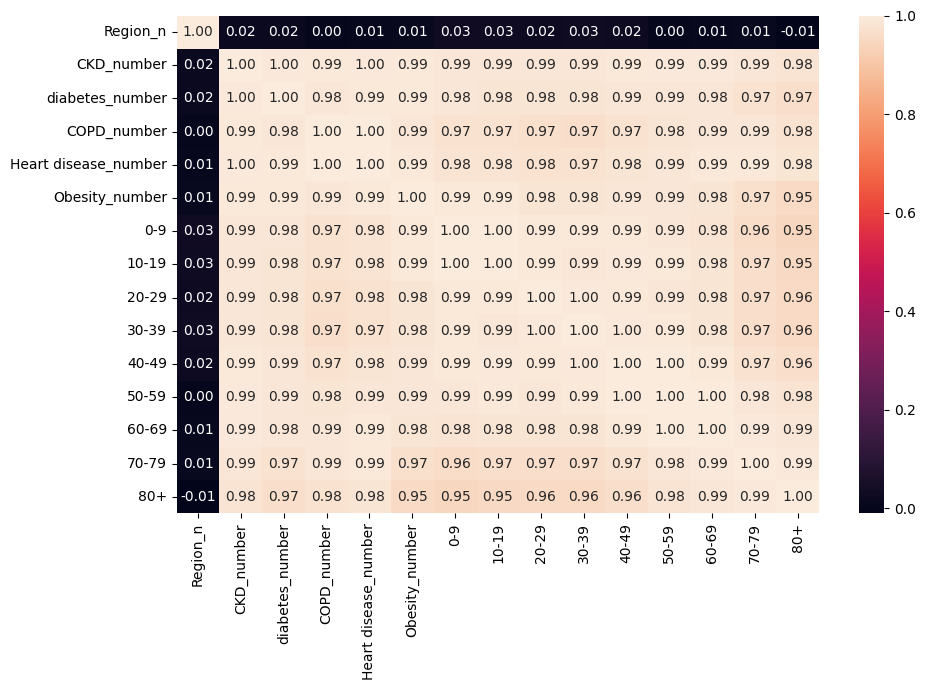

In [25]:
fig, axes = plt.subplots(figsize=(10, 7))

sns.heatmap(total_data[[
    'Region_n', 'CKD_number', 'diabetes_number', 'COPD_number', 'Heart disease_number', 'Obesity_number',
    '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Todas con una altísima correlación entre ellas excepto la variable region que es muy baja

Ingieneria de caracteristicas



*   Atípicos



In [26]:
total_data.describe()

,CKD_number,diabetes_number,COPD_number,Heart disease_number,Obesity_number,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,Region_n
count,2752.000000,2752.000000,2752.000000,2752.000000,2.752000e+03,2.752000e+03,2.752000e+03,2.752000e+03,2.752000e+03,2.752000e+03,2.752000e+03,2.752000e+03,2752.000000,2752.000000,2752.000000
mean,2544.753270,9600.208939,5942.929506,5742.144259,2.597429e+04,1.325123e+04,1.389521e+04,1.505130e+04,1.448937e+04,1.341863e+04,1.410952e+04,1.226566e+04,7434.205669,4132.990552,1.710029
std,8133.350401,31314.129526,16484.658266,16393.101238,7.819516e+04,4.406859e+04,4.457539e+04,5.222174e+04,5.163944e+04,4.589332e+04,4.495036e+04,3.619009e+04,21271.406487,12608.583328,0.797716
min,3.000000,11.000000,8.000000,7.000000,3.800000e+01,2.800000e+01,2.800000e+01,2.400000e+01,2.600000e+01,4.000000e+00,1.400000e+01,2.000000e+01,8.000000,0.000000,0.000000
25%,296.000000,1098.750000,765.750000,740.000000,2.891000e+03,1.233750e+03,1.319750e+03,1.207750e+03,1.191750e+03,1.172250e+03,1.424250e+03,1.412000e+03,905.000000,511.750000,1.000000
50%,703.000000,2698.000000,1905.000000,1771.500000,7.010500e+03,3.029500e+03,3.217500e+03,3.058000e+03,2.961000e+03,3.005000e+03,3.491500e+03,3.385500e+03,2170.000000,1159.500000,2.000000
75%,1800.500000,6765.750000,4748.500000,4407.750000,1.864700e+04,8.202750e+03,9.055500e+03,9.062000e+03,8.427500e+03,8.241000e+03,9.250250e+03,8.818000e+03,5604.750000,2906.000000,2.000000
max,237766.000000,952335.000000,434075.000000,434790.000000,2.097906e+06,1.208253e+06,1.239139e+06,1.557073e+06,1.501844e+06,1.350076e+06,1.306003e+06,1.014325e+06,572530.000000,356275.000000,3.000000


Voy a limpiar todas las variables numericas que conienen atipicos excepto la que utilizare como variable dependiente

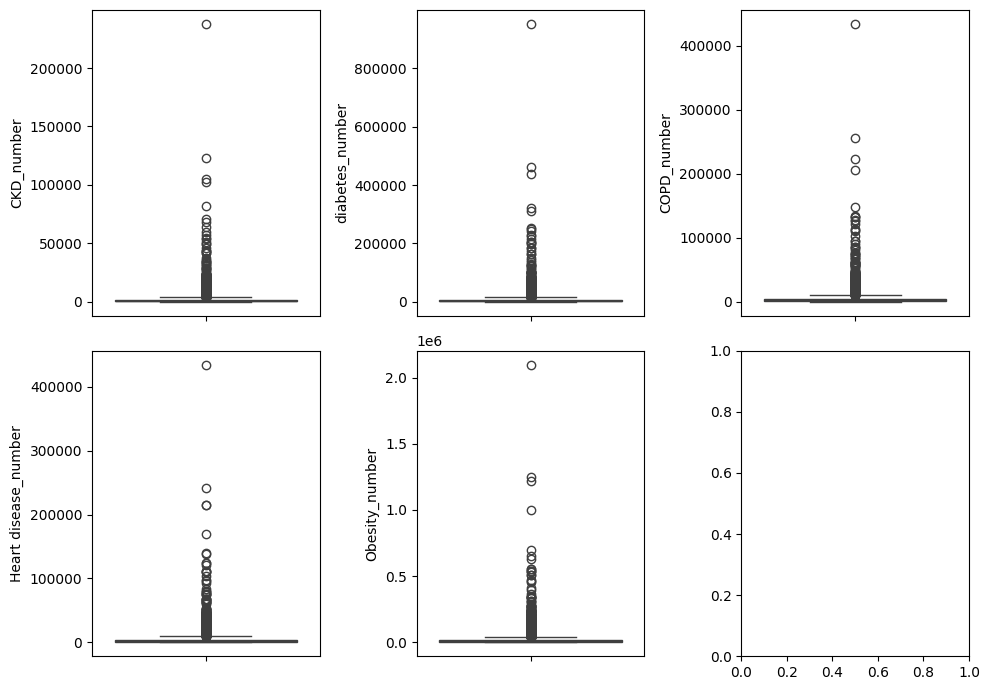

In [27]:
fig, axes = plt.subplots(2, 3, figsize = (10, 7))

sns.boxplot(ax = axes[0, 0], data = data, y = "CKD_number")
sns.boxplot(ax = axes[0, 1], data = data, y = "diabetes_number")
sns.boxplot(ax = axes[0, 2], data = data, y = "COPD_number")
sns.boxplot(ax = axes[1, 0], data = data, y = "Heart disease_number")
sns.boxplot(ax = axes[1, 1], data = data, y = "Obesity_number")


plt.tight_layout()

plt.show()

Todas tienen un valor atipico gigante que no me gusta ni un pelo, debería eliminar ese en todas, pero voy directamente a imputarlos por el tiempo Cesar

In [28]:
ckd_stats = total_data["CKD_number"].describe()
ckd_stats

count      2752.000000
mean       2544.753270
std        8133.350401
min           3.000000
25%         296.000000
50%         703.000000
75%        1800.500000
max      237766.000000
Name: CKD_number, dtype: float64

In [29]:
ckd_iqr = ckd_stats["75%"] - ckd_stats["25%"]
upper_limit = ckd_stats["75%"] + 1.5 * ckd_iqr
lower_limit = ckd_stats["25%"] - 1.5 * ckd_iqr

In [30]:
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(ckd_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 4057.25 y -1960.75, con un rango intercuartílico de 1504.5


In [31]:
median_CKD = total_data['CKD_number'].median()
total_data['CKD_number'] = total_data['CKD_number'].apply(lambda x: median_CKD if x < lower_limit or x > upper_limit else x)

In [32]:
CKD_number = total_data["CKD_number"].describe()
CKD_number

count    2752.000000
mean      855.839390
std       810.856557
min         3.000000
25%       296.000000
50%       703.000000
75%      1054.000000
max      4039.000000
Name: CKD_number, dtype: float64

Ya están imputados, sigo con las otras dos explicativas

In [33]:
diabetes_stats = total_data["diabetes_number"].describe()
diabetes_stats

count      2752.000000
mean       9600.208939
std       31314.129526
min          11.000000
25%        1098.750000
50%        2698.000000
75%        6765.750000
max      952335.000000
Name: diabetes_number, dtype: float64

In [34]:
diabetes_iqr = diabetes_stats["75%"] - diabetes_stats["25%"]
upper_limit = diabetes_stats["75%"] + 1.5 * diabetes_iqr
lower_limit = diabetes_stats["25%"] - 1.5 * diabetes_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(diabetes_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 15266.25 y -7401.75, con un rango intercuartílico de 5667.0


In [35]:
median_diabetes = total_data['diabetes_number'].median()
total_data['diabetes_number'] = total_data['diabetes_number'].apply(lambda x: median_diabetes if x < lower_limit or x > upper_limit else x)

In [36]:
diabetes_number = total_data["diabetes_number"].describe()
diabetes_number

count     2752.000000
mean      3242.412427
std       3076.493206
min         11.000000
25%       1098.750000
50%       2697.500000
75%       3938.750000
max      15229.000000
Name: diabetes_number, dtype: float64

In [37]:
COPD_stats = total_data["COPD_number"].describe()
COPD_stats

count      2752.000000
mean       5942.929506
std       16484.658266
min           8.000000
25%         765.750000
50%        1905.000000
75%        4748.500000
max      434075.000000
Name: COPD_number, dtype: float64

In [38]:
COPD_iqr = COPD_stats["75%"] - COPD_stats["25%"]
upper_limit = COPD_stats["75%"] + 1.5 * COPD_iqr
lower_limit = COPD_stats["25%"] - 1.5 * COPD_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(COPD_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 10722.62 y -5208.38, con un rango intercuartílico de 3982.75


In [39]:
median_COPD = total_data['COPD_number'].median()
total_data['COPD_number'] = total_data['COPD_number'].apply(lambda x: median_COPD if x < lower_limit or x > upper_limit else x)

In [40]:
COPD_number = total_data["COPD_number"].describe()
COPD_number

count     2752.000000
mean      2308.965480
std       2189.182845
min          8.000000
25%        765.750000
50%       1902.000000
75%       2883.750000
max      10680.000000
Name: COPD_number, dtype: float64

In [41]:
obesity_stats = total_data["Obesity_number"].describe()
obesity_stats

count    2.752000e+03
mean     2.597429e+04
std      7.819516e+04
min      3.800000e+01
25%      2.891000e+03
50%      7.010500e+03
75%      1.864700e+04
max      2.097906e+06
Name: Obesity_number, dtype: float64

In [42]:
obesity_iqr = obesity_stats["75%"] - obesity_stats["25%"]
upper_limit = obesity_stats["75%"] + 1.5 * obesity_iqr
lower_limit = obesity_stats["25%"] - 1.5 * obesity_iqr
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(obesity_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 42281.0 y -20743.0, con un rango intercuartílico de 15756.0


In [43]:
median_obesity = total_data['Obesity_number'].median()
total_data['Obesity_number'] = total_data['Obesity_number'].apply(lambda x: median_COPD if x < lower_limit or x > upper_limit else x)

In [44]:
Obesity_number = total_data["Obesity_number"].describe()
Obesity_number

count     2752.000000
mean      8056.507631
std       8716.916169
min         38.000000
25%       1905.000000
50%       4607.500000
75%      10729.750000
max      42214.000000
Name: Obesity_number, dtype: float64



*   Datos perdidos



In [45]:
total_data.isnull().sum().sort_values(ascending = False)

Región                  0
CKD_number              0
diabetes_number         0
COPD_number             0
Heart disease_number    0
Obesity_number          0
0-9                     0
10-19                   0
20-29                   0
30-39                   0
40-49                   0
50-59                   0
60-69                   0
70-79                   0
80+                     0
Region_n                0
dtype: int64

Escalado de valores

In [46]:

from sklearn.preprocessing import StandardScaler

data_types = total_data.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[numeric_columns])


total_data_scal = pd.DataFrame(norm_features, index = total_data.index, columns = numeric_columns)
total_data_scal["Heart disease_number"] = total_data["Heart disease_number"]
total_data_scal.head()

,CKD_number,diabetes_number,COPD_number,Obesity_number,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,Region_n,Heart disease_number
0,-0.188526,-0.176991,-0.184562,-0.705826,2.159158,2.604147,1.868636,1.912464,2.439455,2.871767,2.609236,2.597799,2.983987,-2.144045,40301
1,-0.188526,-0.176991,-0.184562,-0.705826,1.931495,2.205739,1.942910,1.986355,2.094854,2.523408,2.568057,2.667765,3.018731,-2.144045,42859
2,-0.188526,3.399809,3.405101,3.122026,0.062227,0.153875,0.079841,0.087829,0.175185,0.368684,0.431311,0.441837,0.408448,-2.144045,10150
3,3.430528,2.863711,2.564452,3.239290,0.019445,0.112724,0.079746,0.078765,0.133363,0.279147,0.296885,0.315448,0.349588,-2.144045,8502
4,-0.188526,-0.176991,-0.184562,-0.705826,1.747384,2.137931,1.966181,1.828811,1.955244,2.413244,2.507726,2.607250,2.844453,-2.144045,44330


Seleccion de caracteristicas

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,40-49,50-59,60-69,70-79,80+
0,-0.049464,-0.030095,-0.013339,-0.005746,-0.026335
1,-0.268511,-0.287692,-0.305102,-0.311658,-0.298580
2,0.194080,0.206320,0.278645,0.372953,0.333644
3,-0.278602,-0.298395,-0.320247,-0.322708,-0.306909
4,-0.257157,-0.274965,-0.292030,-0.298587,-0.284778


Ostias cesar, al limpiar los atipicos solo me coge las variables de edad

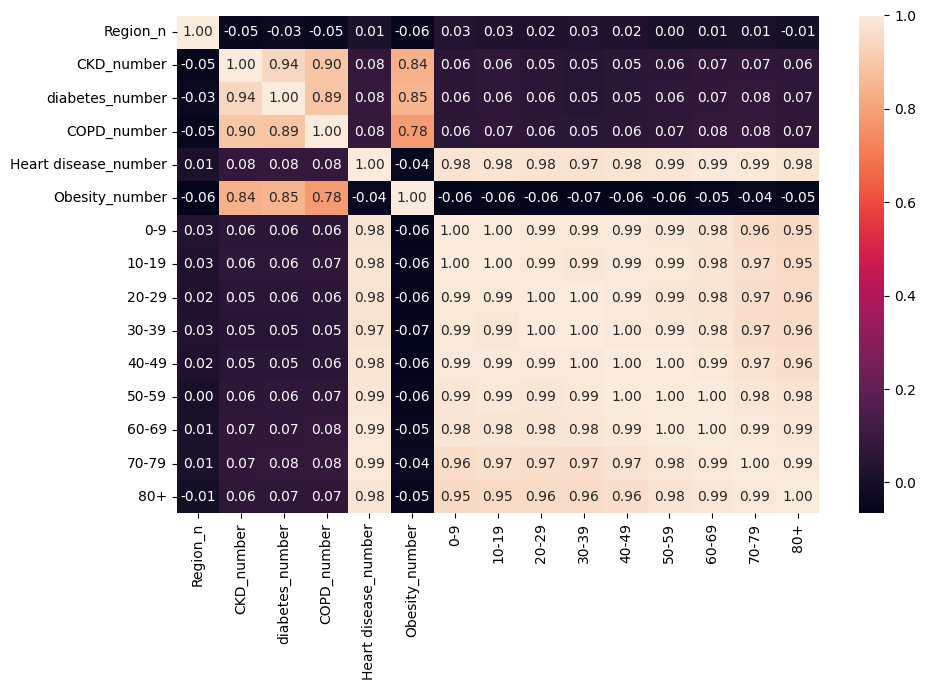

In [48]:
fig, axes = plt.subplots(figsize=(10, 7))

sns.heatmap(total_data[[
    'Region_n', 'CKD_number', 'diabetes_number', 'COPD_number', 'Heart disease_number', 'Obesity_number',
    '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [49]:
X_test_sel.head()

,40-49,50-59,60-69,70-79,80+
0,0.028340,0.076220,0.078692,0.096569,0.009916
1,-0.243841,-0.247530,-0.266935,-0.277287,-0.260583
2,-0.249987,-0.265419,-0.280726,-0.293791,-0.279622
3,-0.248112,-0.260502,-0.276028,-0.291628,-0.252572
4,-0.280018,-0.298039,-0.320993,-0.333335,-0.307941


# 3.Regresion Logistica

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sel, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): [-0.09980055 -0.09927748 -0.09876701 ... -5.63849027 -7.20677045
 -8.25460043]
Coefficients: [[-0.11976525 -0.13541055 -0.15518214 -0.16436423 -0.14904939]
 [-0.11937485 -0.13495266 -0.1547935  -0.1640536  -0.14773921]
 [-0.11885669 -0.13488909 -0.15421583 -0.16305132 -0.14713133]
 ...
 [ 0.86338514  0.8666301   0.21964848  0.68631618  1.41237237]
 [ 0.75887722  0.57911702  0.73897096  1.54138685  0.59872556]
 [ 0.7576038   0.88130133  1.12701964  0.5603562   1.02898179]]


In [52]:
y_pred = model.predict(X_test_sel)
y_pred

array([  2969,    317,    317,    317,    317,    317,    317,    317,
          317,   1380,    317,   2969,   1380,   1380,   1380,    317,
         2969,    317,    317,   1380,   1380,    317,  11305,    317,
         1380,    317,  53850,   1380,    317,    317,    691,    317,
        37455,    317,    317,  11305,   1380,    317,    317,    317,
         1380,    317,    691,  50058,    317,   1380,    317,    317,
         1380,  11305,    317,    317, 111793,   1380,   1380,    317,
         1380,   1380,    317,    317,   1380,    317,    317,    317,
          317,    317,    317,    317,    317,    317,  11305,    317,
          317,    317,    317,    317,  11305,    317,   1380,    317,
         2969,   1380,   1380,    317,    317,    317,    317,    317,
          317,  11305,    317,   1380,    317,   1380,   1380,    317,
         1380,    691,    317,    317,    317,    317,    317,    317,
          317,    317,   1380,    317,    317,    317,  11305,   1380,
      

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 109320789.50453721
R2 Score: 0.8039418727707798


Bueno, me lo sigue dando por valido. Por dios, apruebame esta mierda de dataset. Es una guarrería de analisis, pero la solucion es mas guarreria todavia, por dios, apruebamelo.

# 4.Optimizacion del modelo

In [54]:
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

# entrenamiento
lasso_model.fit(X_train, y_train)

# Evaluacion
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [-0.00000000e+00  1.67927499e+02 -1.54400735e+01 -3.86223527e+00
  1.75172299e+04 -1.54432668e+04  7.45628753e+03 -1.41575876e+04
  8.21825519e+03  2.58153407e+03  0.00000000e+00  1.04182549e+04
  1.08979692e+02 -4.61630511e+01]
R2 score: 0.9919139547518262


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.316e+09, tolerance: 4.314e+07
  model = cd_fast.enet_coordinate_descent(


# Nueva sección